# Введение в анализ данных
## НИУ ВШЭ, 2019-2020 учебный год

### Домашнее задание №4

Задание выполнил(а): _Новиков Владимир_

### Общая информация

__Дата выдачи:__ 18.05.2020

__Дедлайн:__ 23:59 27.05.2020


### Оценивание и штрафы

Оценка за ДЗ вычисляется по следующей формуле:

$$
min(\text{points}, 17)  \times 10 / 17,
$$

где points — количество баллов за обязательную часть, которое вы набрали. Максимальное число баллов, которое можно получить за обязательную часть — 17, если вы получите 19 или 20 баллов вы также получите 1 бонусный балл сверху. Также вы можете использовать бонусные баллы, которые накопили ранее.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Инвайт для группы ИАД-6: rd5CNrr

Перед отправкой перезагрузите ноутбук и проверьте, что все ячейки могут быть последовательно выполнены. Ноутбук должен запускаться с использованием python 3.6+

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer, load_boston
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

## Random Forest своими руками (4 балла)

Реализуйте алгоритм случайного леса. В соответствии с построением алгоритма, ваша реализация должна сочетать в себе метод бэггинга и метод случайных подмножеств. Также она должна работать для двух типов задач: как для задачи регрессии, так и для задачи классификации.

*Примечание. Вы можете использовать `DecisionTree` из `sklearn`.*

In [83]:
class RandomForest:
    def __init__(self, n_estimators, max_depth, max_features='sqrt' or 'log2',
                 task_type='regression' or 'classification'):
        """
        PARAMETERS:
        n_estimators - number of trees in the ensemble
        max_depth - maximum depth of a tree
        max_features - 'sqrt' for sqrt(n_features)
                       'log2' for log2(n_features)
                        None  for n_features 
                        as maximum features for each split in DecisionTree from sklearn
        task_type - 'regression' or 'classification'
        """
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.task_type = task_type
        
        self.X_train = None
        self.y_train = None
        
        if self.max_features == "sqrt":
            self.max_f = int(np.sqrt(len(X_train)))
        elif self.max_features == "log2":
            self.max_f = int(np.log2(len(X_train)))
                
        if self.task_type == "regression":
                self.DTree = DecisionTreeRegressor(max_depth = self.max_depth, max_features = self.max_f, random_state=13)
        elif self.task_type == "classification":
                self.DTree = DecisionTreeClassifier(max_depth = self.max_depth, max_features = self.max_f, random_state=13)

               
        pass
        
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (k, d)
        y_train - np.array of shape (k,)
        """
        self.X_train = X_train
        self.y_train = y_train
        
        self.forest = []
        for i in range(self.n_estimators):
            np.random.seed(19052019)
            boot = np.random.choice(y_train.shape[0], size = y_train.shape[0], replace = True)
            X_boot, y_boot = X_train[boot], y_train[boot]

            #Tree = self.DTree(max_depth = self.max_depth, max_features = self.max_f)
            self.forest.append(self.DTree.fit(X_boot, y_boot)) 
        
        pass
        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        pred = np.zeros((X_test.shape[0], self.n_estimators))
        for i, tree in enumerate(self.forest):
            pred[:, i] = self.DTree.predict(X_test)
            
        y_pred = np.mean(pred, axis = 1)

                
        return y_pred

In [84]:
X_train.shape

(379, 13)

Проверьте вашу реализацию на задаче регрессии. Подберите оптимальные гиперпараметры, чтобы получить MSE < 10.25 **(не меняйте параметры сида)**.

In [85]:
boston = load_boston()
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [86]:
X_train[1,]

array([1.2083e-01, 0.0000e+00, 2.8900e+00, 0.0000e+00, 4.4500e-01,
       8.0690e+00, 7.6000e+01, 3.4952e+00, 2.0000e+00, 2.7600e+02,
       1.8000e+01, 3.9690e+02, 4.2100e+00])

In [99]:
np.random.seed(19052019)

RF = RandomForest(n_estimators = 128, max_depth = 128, max_features = 'log2', task_type = 'regression')
# YOUR CODE HERE

In [100]:
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

In [101]:
mean_squared_error(y_test, y_pred)

21.087165354330708

Проверьте вашу реализацию на задаче классификации. Подберите оптимальные гиперпараметры, чтобы получить accuracy > 0.83 **(не меняйте параметры сида)**.

In [13]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [ ]:
np.random.seed(19052019)

# YOUR CODE HERE

In [25]:
accuracy_score(y_test, y_pred)

0.8391608391608392

## Градиентный бустинг своими руками (5 + 1 баллов)

Реализуйте алгоритм градиентного бустинга для регрессии. Напомним основные формулы.

Обозначим текущую композицию на $N-1$ шаге за $a_{N - 1}(x_i)$. Следующий базовый алгоритм $b_N(x_i)$ обучается на ответах $-\frac{\partial L(y_i, z)}{\partial z}\Bigl|_{z = a_{N - 1}(x_i)}$, где $L(y_i, z)$ — значение функции потерь на объекте при правильном ответе $y_i$ и предсказании $z$. Композиция на следующем шаге получается следующим образом:

$$
a_N(x_i) = a_{N-1}(x_i) + \nu\gamma_Nb_N(x_i)
$$

Здесь $\nu$ — гиперпараметр learning rate, $\gamma_N$ — оптимальный вес, настраиваемый на каждом шаге алгоритма, который можно найти по следующей формуле (обратите внимание на отсутствие $\nu$):

$$
\gamma_N = \mathrm{arg}\min_\gamma \frac{1}{\ell}\sum\limits_{i=1}^{\ell}L\left(y_i, a_{N - 1}(x_i) + \gamma b_N(x_i)\right)
$$

Можете принять $\gamma_N = 1$ для каждого $N$. Однако чтобы получить дополнительный 1 балл вам нужно реализовать нахождение оптимального $\gamma_N$ на каждом шаге.

В качестве функции потерь возьмите MSE (какая у него будет производная?).

*Примечание. Вы можете использовать `DecisionTree` из `sklearn` и методы оптимизации из различных библиотек.*

In [11]:
# это вам может помочь для поиска оптимальных гамма

from scipy.optimize import minimize

In [12]:
class GradientBoosting:
    def __init__(self, n_estimators, max_depth, learning_rate=0.1):
        """
        PARAMETERS:
        n_estimators - number of trees in the ensemble
        max_depth - maximum depth of a tree
        learning_rate - coefficient by which new algorithm result is multiplied
        """
        
        pass
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (k, d)
        y_train - np.array of shape (k,)
        """
        pass
        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        return y_pred

Проверьте вашу реализацию. Подберите оптимальные гиперпараметры, чтобы получить MSE < 10 как в обычном случае, так и при нахождении оптимального шага **(не меняйте параметры сида)**.

In [13]:
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [14]:
np.random.seed(19052019)

# YOUR CODE HERE

In [34]:
mean_squared_error(y_test, y_pred)

9.431819650354331

Для удобства проверяющего укажите, пожалуйста, реализовали ли вы нахождение оптимального шага?

- Да / Нет

## Ансамблевые методы (10 баллов)

Сопровождайте код изображениями и комментариями. Не игнорируйте вопросы, ваши выводы тоже оцениваются. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше. Не забывайте подписывать графики и будет вам счастье!

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

**0. (0 баллов) ** Загрузите [датасет](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data), в нем вы найдете данные опрошенных женщин из индейского племени Пима. Будем решать задачу бинарной классификации: в колонке Outcome лежит метка наличия или отсутствия диабета - это наша целевая переменная. Есть ли пропущенные значения?

In [181]:
data = pd.read_csv('./diabetes.csv')

In [182]:
print(len(data))
data.columns

768


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [183]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [184]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Мы видим, что пропущенных значений (закодированных как ```NA```) в данных нет:

In [186]:
data.isnull().sum(axis = 0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**1. (0.5 балла)** Как вы думаете, является ли наличие нулей в некоторых колонках фактом того, что эти признаки имеют пропущенные значения? Замените нули на среднее значение признака там, где считаете это целесообразным.

In [187]:
data.isin(['0']).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Мы видим, что в данных достаточно много нулей, однако в колонках ```Pregnancies``` и ```Insulin``` ноль - содержательное значение (в остальных его можно перекодировать в ```NA```)

In [188]:
values = {'Glucose': 0, 'BloodPressure': 0, 'SkinThickness': 0,
       'BMI': 0, 'DiabetesPedigreeFunction': 0, 'Age': 0}

data = data.replace(values, np.NaN)

In [189]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0
2,8,183.0,64.0,NaN,0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168,43.1,2.288,33,1


In [190]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101.0,76.0,48.0,180,32.9,0.171,63,0
764,2,122.0,70.0,27.0,0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112,26.2,0.245,30,0
766,1,126.0,60.0,NaN,0,30.1,0.349,47,1
767,1,93.0,70.0,31.0,0,30.4,0.315,23,0


In [191]:
data.isnull().sum(axis = 0)

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [192]:
data = data.fillna(data.mean())
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,0,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,0,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,0,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168,43.1,2.288,33,1


In [193]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101.0,76.0,48.00000,180,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,0,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,0,30.1,0.349,47,1
767,1,93.0,70.0,31.00000,0,30.4,0.315,23,0


In [194]:
data.isnull().sum(axis = 0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**2. (1 балл)** Визуализируйте распределение признаков по отдельности для больных диабетом и здоровых. Ваши графики должны быть примерно такими:

![Image](https://d.radikal.ru/d03/2005/f8/0ffb9443cbcf.png)

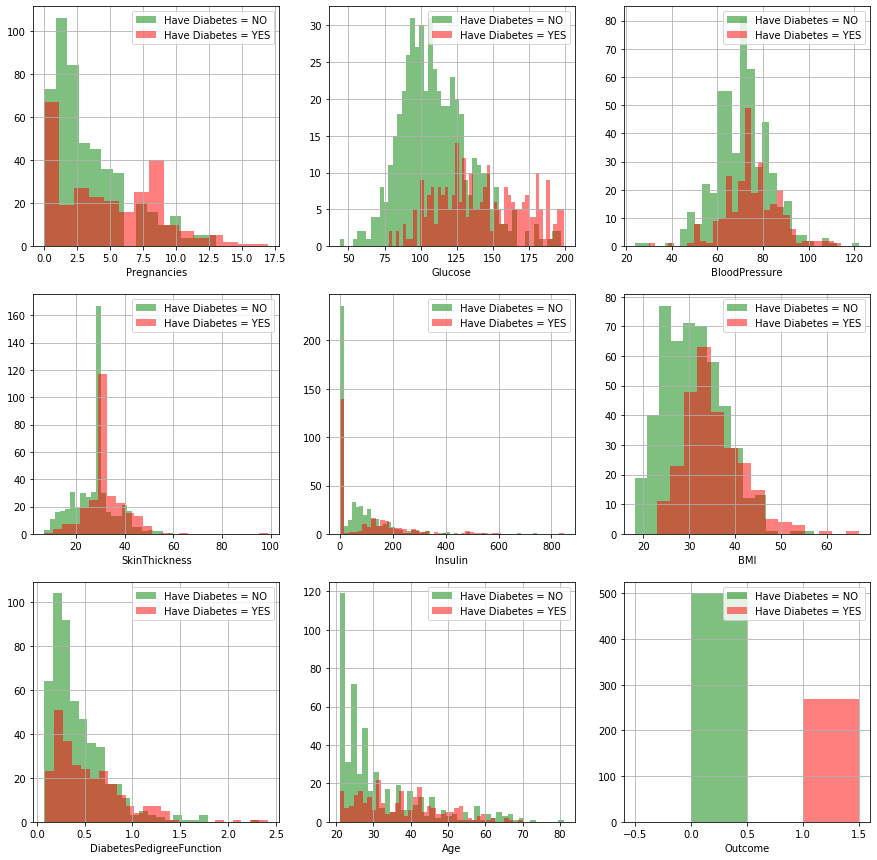

In [396]:
# вот чувствую можно было проще и быстрее "в две строчки" сделать

fig, axs = plt.subplots(3, 3, figsize = (15, 15))

kwargs = dict(alpha=0.5, bins=15)
x1 = data.loc[data.Outcome==0, 'Pregnancies']
x2 = data.loc[data.Outcome==1, 'Pregnancies']

axs[0,0].grid(True)
axs[0,0].hist(x1, **kwargs, color='g', label='Have Diabetes = NO')
axs[0,0].hist(x2, **kwargs, color='r', label='Have Diabetes = YES')
axs[0,0].set_xlabel('Pregnancies')
axs[0,0].legend();

kwargs = dict(alpha=0.5, bins=50)
x1 = data.loc[data.Outcome==0, 'Glucose']
x2 = data.loc[data.Outcome==1, 'Glucose']

axs[0,1].grid(True)
axs[0,1].hist(x1, **kwargs, color='g', label='Have Diabetes = NO')
axs[0,1].hist(x2, **kwargs, color='r', label='Have Diabetes = YES')
axs[0,1].set_xlabel('Glucose')
axs[0,1].legend();

kwargs = dict(alpha=0.5, bins=30)
x1 = data.loc[data.Outcome==0, 'BloodPressure']
x2 = data.loc[data.Outcome==1, 'BloodPressure']

axs[0,2].grid(True)
axs[0,2].hist(x1, **kwargs, color='g', label='Have Diabetes = NO')
axs[0,2].hist(x2, **kwargs, color='r', label='Have Diabetes = YES')
axs[0,2].set_xlabel('BloodPressure')
axs[0,2].legend();

kwargs = dict(alpha=0.5, bins=25)
x1 = data.loc[data.Outcome==0, 'SkinThickness']
x2 = data.loc[data.Outcome==1, 'SkinThickness']

axs[1,0].grid(True)
axs[1,0].hist(x1, **kwargs, color='g', label='Have Diabetes = NO')
axs[1,0].hist(x2, **kwargs, color='r', label='Have Diabetes = YES')
axs[1,0].set_xlabel('SkinThickness')
axs[1,0].legend();

kwargs = dict(alpha=0.5, bins=50)
x1 = data.loc[data.Outcome==0, 'Insulin']
x2 = data.loc[data.Outcome==1, 'Insulin']

axs[1,1].grid(True)
axs[1,1].hist(x1, **kwargs, color='g', label='Have Diabetes = NO')
axs[1,1].hist(x2, **kwargs, color='r', label='Have Diabetes = YES')
axs[1,1].set_xlabel('Insulin')
axs[1,1].legend();

kwargs = dict(alpha=0.5, bins=15)
x1 = data.loc[data.Outcome==0, 'BMI']
x2 = data.loc[data.Outcome==1, 'BMI']

axs[1,2].grid(True)
axs[1,2].hist(x1, **kwargs, color='g', label='Have Diabetes = NO')
axs[1,2].hist(x2, **kwargs, color='r', label='Have Diabetes = YES')
axs[1,2].set_xlabel('BMI')
axs[1,2].legend();

kwargs = dict(alpha=0.5, bins=25)
x1 = data.loc[data.Outcome==0, 'DiabetesPedigreeFunction']
x2 = data.loc[data.Outcome==1, 'DiabetesPedigreeFunction']

axs[2,0].grid(True)
axs[2,0].hist(x1, **kwargs, color='g', label='Have Diabetes = NO')
axs[2,0].hist(x2, **kwargs, color='r', label='Have Diabetes = YES')
axs[2,0].set_xlabel('DiabetesPedigreeFunction')
axs[2,0].legend();

kwargs = dict(alpha=0.5, bins=40)
x1 = data.loc[data.Outcome==0, 'Age']
x2 = data.loc[data.Outcome==1, 'Age']

axs[2,1].grid(True)
axs[2,1].hist(x1, **kwargs, color='g', label='Have Diabetes = NO')
axs[2,1].hist(x2, **kwargs, color='r', label='Have Diabetes = YES')
axs[2,1].set_xlabel('Age')
axs[2,1].legend();

kwargs = dict(alpha=0.5, bins=2)
x1 = data.loc[data.Outcome==0, 'Outcome']
x2 = data.loc[data.Outcome==1, 'Outcome']

axs[2,2].grid(True)
axs[2,2].hist(x1, **kwargs, color='g', label='Have Diabetes = NO')
axs[2,2].hist(x2, **kwargs, color='r', label='Have Diabetes = YES')
axs[2,2].set_xlabel('Outcome')
axs[2,2].legend();


**3. (2 балла)** Разбейте данные на обучающую и тестовую часть в соотношении 70:30. Обучите *BaggingClassifier* на деревьях (поставьте параметр *base_estimator = DecisionTreeClassifier()*) и *RandomForest*. Возьмите количество базовых алгоритмов, равное 10. Посчитайте accuracy, recall и precision. Есть ли какая-то разница между моделями и их результатами? Как вы думаете, почему получились такие результаты?

*tip: создайте отдельную функцию для вывода метрик качества;*

In [317]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [246]:
def quality_metrics(predict, true):
    accuracy = accuracy_score(true, predict)
    precision = precision_score(true, predict)
    recall = recall_score(true, predict)
    
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall}

In [268]:
df = data.to_numpy()

In [281]:
X = df[:,:8]
y = df[:,8]

In [283]:
X.shape

(768, 8)

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [310]:
print(X_train[:5])

[[ 10.         122.          68.          29.15341959   0.
   31.2          0.258       41.        ]
 [  1.          96.          64.          27.          87.
   33.2          0.289       21.        ]
 [  1.         164.          82.          43.          67.
   32.8          0.341       50.        ]
 [ 10.          90.          85.          32.           0.
   34.9          0.825       56.        ]
 [  2.         106.          64.          35.         119.
   30.5          1.4         34.        ]]


In [298]:
print(y_train.shape)

(537,)


In [312]:
bag_clf = BaggingClassifier(base_estimator = DecisionTreeClassifier(random_state=13), n_estimators=10,
                            bootstrap=True, random_state=13)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [313]:
print(quality_metrics(y_pred, y_test))

{'accuracy': 0.7445887445887446, 'precision': 0.7413793103448276, 'recall': 0.4942528735632184}


In [377]:
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=13)

rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [315]:
print(quality_metrics(y_pred_rf, y_test))

{'accuracy': 0.7445887445887446, 'precision': 0.7333333333333333, 'recall': 0.5057471264367817}


In [316]:
np.sum(y_pred == y_pred_rf) / len(y_pred)

0.9047619047619048

Можно заметить, что __RF__ и __BaggingClassifier__ дали одинаковые показатели _accuracy_ и близкие, хотя и различные показатели _recall_ and _precision_ : предсказания моделей почти не отличаются

**4. (2 балл)** Для случайного леса проанализируйте значение ROC-AUC на этих же данных в зависимости от изменения параметров:
* *n_estimators* (можно перебрать около 10 значений из отрезка от 10 до 1500)
* *min_samples_leaf* (сетку значений можете выбрать на ваше усмотрение)

Постройте соответствующие графики зависимости ROC-AUC от этих параметров. Какие выводы можете сделать?

In [375]:
auc_roc_res = np.zeros(1500)

for i in range(10,1500, 60):
    rnd_clf_i = RandomForestClassifier(n_estimators = i, min_samples_leaf = 1, random_state=13)

    rnd_clf_i.fit(X_train, y_train)
    y_pred_rf = rnd_clf_i.predict(X_test)
    auc_roc_res[i] = roc_auc_score(y_test, y_pred_rf)

In [325]:
import matplotlib.pyplot as plt

Видно, что показатель ROC-AUC возрастает примерно до n_estimators = 500, после чего выходит на ассимптоту и дальнейшее увеличение количества деревьев не приводит к значительному улучшению качества классификатора:

Text(0, 0.5, 'AUC-ROC score')

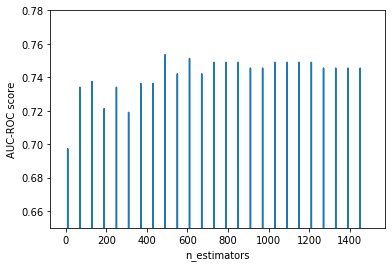

In [376]:
plt.plot(auc_roc_res)
plt.ylim(0.65, 0.78)
plt.xlabel('n_estimators')
plt.ylabel('AUC-ROC score')

**5. (1 балл)**. Посмотрите, оказались ли какие-то признаки более важными, чем остальные? Воспользуйтесь соответствующим аттрибутом случайного леса в библиотеке sklearn, чтобы построить barplot.

In [395]:
rnd_clf_i.feature_importances_

array([0.08740295, 0.2625822 , 0.09155452, 0.0793325 , 0.06537761,
       0.16048344, 0.11692373, 0.13634306])

Мы видим, что наиболее важным предиктором оказалась концентрация глюкозы в плазме через два часа после теста, наименее важным - уровень инсулина:

<BarContainer object of 8 artists>

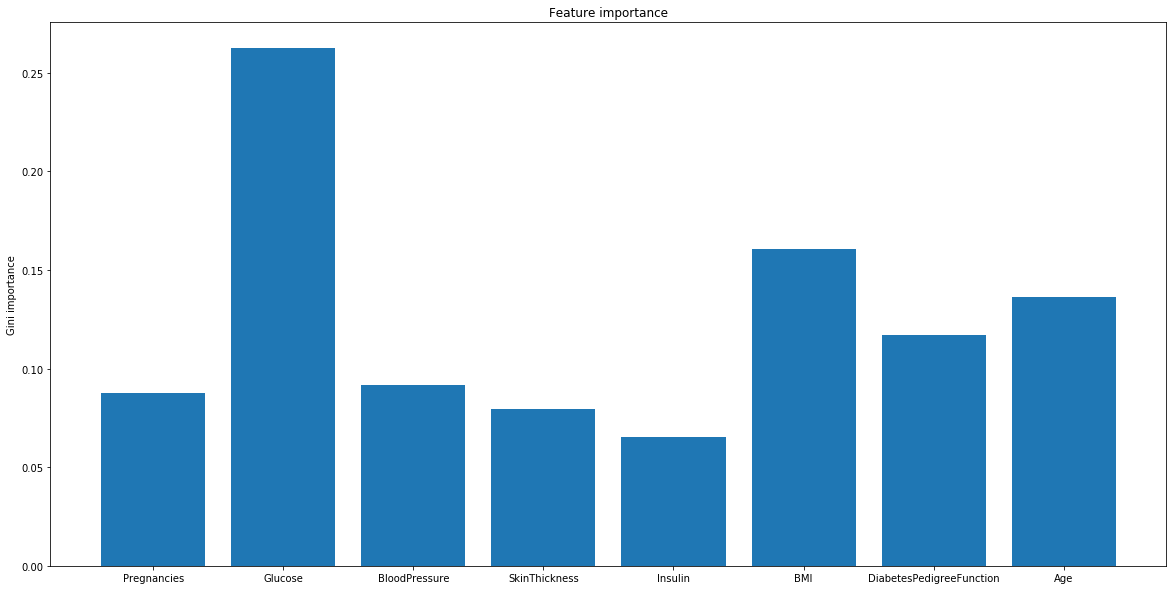

In [397]:
labels = ('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age')
importance = rnd_clf_i.feature_importances_
x = np.arange(8)

fig, ax = plt.subplots(figsize =(20, 10))

ax.set_title('Feature importance')
ax.set_ylabel('Gini importance')
plt.xticks(x, labels)
ax.bar(x, importance)

**6. (2 балла)** Обучите HistGradientBoostingClassifier и GradientBoostingClassifier из sklearn. Опишите подробно, в чем заключается разница этих моделей. Подберите подходящее количество деревьев и проанализируйте метрики, с которыми мы работали выше.

In [399]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier

In [418]:
gb_clf = GradientBoostingClassifier(random_state = 13, n_estimators = 550)

gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)

In [419]:
print(quality_metrics(y_pred_gb, y_test))

{'accuracy': 0.7619047619047619, 'precision': 0.6951219512195121, 'recall': 0.6551724137931034}


In [416]:
hgb_clf = HistGradientBoostingClassifier(random_state = 13, max_iter = 610)

hgb_clf.fit(X_train, y_train)
y_pred_hgb = hgb_clf.predict(X_test)

In [417]:
print(quality_metrics(y_pred_hgb, y_test))

{'accuracy': 0.7056277056277056, 'precision': 0.6233766233766234, 'recall': 0.5517241379310345}


Можно заметить, что Histogram-based Gradient Boosting показал несколько худший результат на нашей выборке;

Новаторство HistGB заключается в том, что он позволяет проводить вычисления на больших выборках (что неактуально на нашем датасете) намного быстрее, так как вместо работы со всем входящим ```X``` разбивает его на несколько (по умолчанию 256) частей, как в гистограмме, что позволяет ускорить вычисления

**7. (1.5 балла)** Вспомните, что представляет собой [стэкинг моделей](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier). Возьмите в качестве базовых моделей любой ансамблевый метод из тех, которые были использованы выше, и простой классфикатор из уже вами изученных на курсе. Как final_estimator используйте лог-регресссию. Посчитайте метрики для мета-классификатора. Улучшилось ли качество?

In [21]:
# Можете и сами обучить логистическую поверх ответов, а не использовать `StackingClassifier`

In [423]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

*tip: не забудьте завести список базовых алгоритмов*
<code>
base_learners = [
                 ('name1', model1(),
                 ('name2', model2())             
                ]

</code>

In [430]:
estimators = [
    ('RF', RandomForestClassifier(n_estimators = 550, min_samples_leaf = 1, random_state=13)),
    ('SVC', LinearSVC(C = 0.1, max_iter = 50000, random_state = 13))
]

stack_clf = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression())

In [431]:
stack_clf.fit(X_train, y_train)
y_pred_stack = stack_clf.predict(X_test)

C:\Users\Vladimir\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Vladimir\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Vladimir\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Vladimir\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Vladimir\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

In [432]:
print(quality_metrics(y_pred_stack, y_test))

{'accuracy': 0.7532467532467533, 'precision': 0.734375, 'recall': 0.5402298850574713}


На нашей относительно небольшой стэкинг моделей не привел к значимому улучешнию результатов случайного леса (как лучшего из двух базовых алгоритмов)